## Import

In [2]:
# Data Manipulation libraries
import pandas as pd
import numpy as np
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for normalization
from sklearn.preprocessing import StandardScaler
# for encoding
from sklearn.preprocessing import LabelEncoder
# for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# for model selection and training
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Seed for random state
SEED = 42

In [19]:
class LabelEncoderExt(LabelEncoder):
    def fit(self, data):
        self.classes_ = np.append(np.unique(data), 'Unknown')
        return self

    def transform(self, data):
        new_data = np.where(np.isin(data, self.classes_), data, 'Unknown')
        return super().transform(new_data)

### Prob 1

In [26]:
df2['feature4'].value_counts()

0        FIN
1        FIN
2        INT
3        FIN
4        CON
        ... 
61836    FIN
61837    FIN
61838    INT
61839    INT
61840    INT
Name: feature4, Length: 61841, dtype: object

In [20]:
df2 = pd.read_parquet('data/raw_data/phase-2/prob-2/raw_train.parquet')
df2

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.041847,tcp,-,FIN,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,Normal
1,1.089133,tcp,http,FIN,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,Normal
2,0.000002,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,Other
3,1.467246,tcp,ftp,FIN,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Denial of Service
4,0.000927,udp,dns,CON,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61836,1.751882,tcp,smtp,FIN,52.0,40.0,37232.0,3276.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,Normal
61837,0.929489,tcp,-,FIN,10.0,10.0,608.0,646.0,254.0,252.0,...,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,Exploits
61838,0.000008,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,41.0,20.0,51.0,0.0,0.0,0.0,41.0,51.0,0.0,Other
61839,0.000009,unas,-,INT,2.0,0.0,200.0,0.0,254.0,0.0,...,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0,Information Gathering


In [149]:
df1 = pd.read_parquet('data/raw_data/phase-2/prob-1/raw_train.parquet')
df1

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.041847,tcp,-,FIN,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,0
1,1.089133,tcp,http,FIN,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0
2,0.000002,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,1
3,1.467246,tcp,ftp,FIN,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,1
4,0.000927,udp,dns,CON,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61836,1.751882,tcp,smtp,FIN,52.0,40.0,37232.0,3276.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0
61837,0.929489,tcp,-,FIN,10.0,10.0,608.0,646.0,254.0,252.0,...,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,1
61838,0.000008,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,41.0,20.0,51.0,0.0,0.0,0.0,41.0,51.0,0.0,1
61839,0.000009,unas,-,INT,2.0,0.0,200.0,0.0,254.0,0.0,...,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0,1


In [150]:
df1['NewCol'] = df2['label']

In [152]:
df1.isna().count()

feature1     61841
feature2     61841
feature3     61841
feature4     61841
feature5     61841
feature6     61841
feature7     61841
feature8     61841
feature9     61841
feature10    61841
feature11    61841
feature12    61841
feature13    61841
feature14    61841
feature15    61841
feature16    61841
feature17    61841
feature18    61841
feature19    61841
feature20    61841
feature21    61841
feature22    61841
feature23    61841
feature24    61841
feature25    61841
feature26    61841
feature27    61841
feature28    61841
feature29    61841
feature30    61841
feature31    61841
feature32    61841
feature33    61841
feature34    61841
feature35    61841
feature36    61841
feature37    61841
feature38    61841
feature39    61841
feature40    61841
feature41    61841
label        61841
NewCol       61841
dtype: int64

In [153]:
df1 = df1.drop_duplicates()
df1_x = df1.drop("label", axis=1)
df1_y = df1['label']

In [155]:
label_encoder = LabelEncoder()
df1_y = label_encoder.fit_transform(df1_y)

#### Data Analysis and Preprocessing

In [157]:
# Descriptive analysis of the data
df1_x.describe()

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,...,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41
count,46057.000000,46057.000000,46057.000000,4.605700e+04,4.605700e+04,46057.000000,46057.000000,4.605700e+04,4.605700e+04,46057.000000,...,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000
mean,1.337640,24.845040,24.433115,1.082244e+04,1.908143e+04,158.614434,112.224092,5.768994e+07,8.795485e+05,6.332501,...,3.997742,2.998741,2.191002,5.381744,0.014677,0.014721,0.168595,4.771718,6.376338,0.007730
std,5.752645,152.705912,126.246677,1.959619e+05,1.655425e+05,106.735991,117.248957,2.027677e+08,2.749426e+06,73.764318,...,5.770388,5.476635,3.670234,8.460771,0.122584,0.123109,0.691612,6.298161,8.421899,0.087578
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000010,2.000000,0.000000,2.000000e+02,0.000000e+00,31.000000,0.000000,9.634264e+03,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.195081,10.000000,8.000000,8.100000e+02,3.540000e+02,254.000000,29.000000,2.231602e+05,4.597335e+03,2.000000,...,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,0.885717,16.000000,18.000000,1.958000e+03,1.838000e+03,254.000000,252.000000,4.160000e+07,1.378809e+05,4.000000,...,4.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,7.000000,0.000000
max,59.999935,10646.000000,10872.000000,1.435577e+07,1.459086e+07,255.000000,254.000000,5.468000e+09,2.242273e+07,5319.000000,...,59.000000,59.000000,46.000000,63.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


<Axes: ylabel='count'>

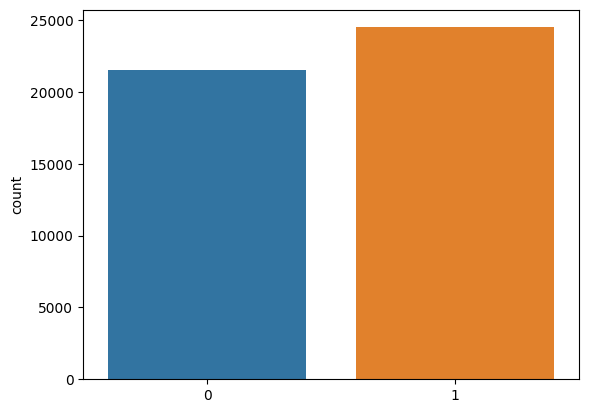

In [158]:
# Target Class Distribution
sns.countplot(x = df1_y)

##### Encoding Categorical Data

In [159]:
# encode the selected columns
for col in df1_x.select_dtypes("object"):
    le = LabelEncoderExt()
    le.fit(df1_x[col])
    df1_x[col] = le.transform(df1_x[col])

In [160]:
df1_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,NewCol
0,0.041847,112,0,3,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,4
1,1.089133,112,5,3,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,4
2,0.000002,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,5
3,1.467246,112,3,3,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,0
4,0.000927,118,2,1,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61833,0.342536,112,9,3,52.0,38.0,37230.0,3172.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,4
61834,11.619566,112,0,5,6.0,0.0,270.0,0.0,254.0,0.0,...,2.0,2.0,35.0,0.0,0.0,0.0,14.0,35.0,0.0,4
61836,1.751882,112,9,3,52.0,40.0,37232.0,3276.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,4
61837,0.929489,112,0,3,10.0,10.0,608.0,646.0,254.0,252.0,...,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,1


##### Normalizing the numerical data.

In [161]:
SEED = 42
scaler1 = StandardScaler()
# store the columns
cols1 = df1_x.columns

# transform the data
df1_x_scaled = scaler1.fit_transform(df1_x)

df1_x_scaled = pd.DataFrame(df1_x_scaled, columns=cols1)
#rfc1 = RandomForestClassifier()

#rfc1.fit(df1_x_scaled, df1_y)

#feat_imp = pd.DataFrame({'feature': df1_x.columns, 'importance': rfc1.feature_importances_})
#feat_imp = feat_imp.sort_values('importance', ascending=False).set_index('feature')

# plot feat_imp
#plt.figure(figsize=(10, 5))
#plt.title("Feature Importance")
#plt.ylabel("Importances")
#plt.xlabel("Features")
#plt.xticks(rotation=90)
#plt.plot(feat_imp)

estimator1 = RandomForestClassifier(random_state=SEED)
selector1 = RFE(estimator1)
selector1.fit(df1_x_scaled, df1_y)

df1_x_scaled = selector1.transform(df1_x_scaled)


In [162]:
import itertools
feature_map_1 = [(i, v) for i, v in itertools.zip_longest(selector1.get_support(), df1_x.columns)]
selected_features_1 = [v for i, v in feature_map_1 if i==True]

selected_features_1

['feature1',
 'feature3',
 'feature4',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature16',
 'feature23',
 'feature25',
 'feature26',
 'feature27',
 'feature30',
 'feature31',
 'feature34',
 'feature35',
 'feature40',
 'NewCol']

In [169]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

class ModelEvaluator:
    def __init__(self, models, X_train_scaled, y_train):
        self.models = models
        self.X_train_scaled = X_train_scaled
        self.y_train = y_train
        self.scores = self.evaluate_models()

    def evaluate_models(self):
        scores = {}
        for name, model in self.models.items():
            scores[name] = {}
            for scorer in ['precision', 'recall']:
                if scorer == 'precision':
                    scorer_func = make_scorer(precision_score, average='weighted')
                elif scorer == 'recall':
                    scorer_func = make_scorer(recall_score, average='weighted')
                scores[name][scorer] = cross_val_score(model, self.X_train_scaled, self.y_train, cv=10, scoring=scorer_func, error_score="raise")
        return scores

    def print_scores(self):
        def line(name):
            return '*' * (25 - len(name) // 2)

        for name in self.models:
            print(line(name), name, 'Model Validation', line(name))

            for scorer in ['precision', 'recall']:
                mean = round(np.mean(self.scores[name][scorer]) * 100, 2)
                stdev = round(np.std(self.scores[name][scorer]) * 100, 2)
                print("Mean {}:".format(scorer), "\n", mean, "%", "+-", stdev)
                print()

    def get_scores_dataframe(self):
        scores_df = pd.DataFrame(self.scores).swapaxes("index", "columns") * 100
        return scores_df


# Define models
models = {
    'LightGBM Classifier': LGBMClassifier(random_state=SEED)
}

# Create instance of ModelEvaluator
evaluator = ModelEvaluator(models, df1_x_scaled, df1_y)

# Print model scores
evaluator.print_scores()

# Get scores as a DataFrame
scores_df = evaluator.get_scores_dataframe()


**************** LightGBM Classifier Model Validation ****************
Mean precision: 
 100.0 % +- 0.0

Mean recall: 
 100.0 % +- 0.0



In [34]:
# Train XGBoost Classifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)
# Train LightGBM Classifier
lgbmc = LGBMClassifier(random_state=SEED)

models = {}
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
    scores[name]={}
    for scorer in ['precision','recall']:
        scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=10, scoring=scorer)
            
def line(name):
    return '*'*(25-len(name)//2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision','recall']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
        print()

NameError: name 'X_train_scaled' is not defined

In [160]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size=0.2, random_state=SEED)

##### Feature Selection

In [79]:
rfc = RandomForestClassifier();

rfc.fit(df_train_scaled, df_y)

feat_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feat_imp = feat_imp.sort_values('importance',ascending=False).set_index('feature')

##### Visualization of the Feature Importances

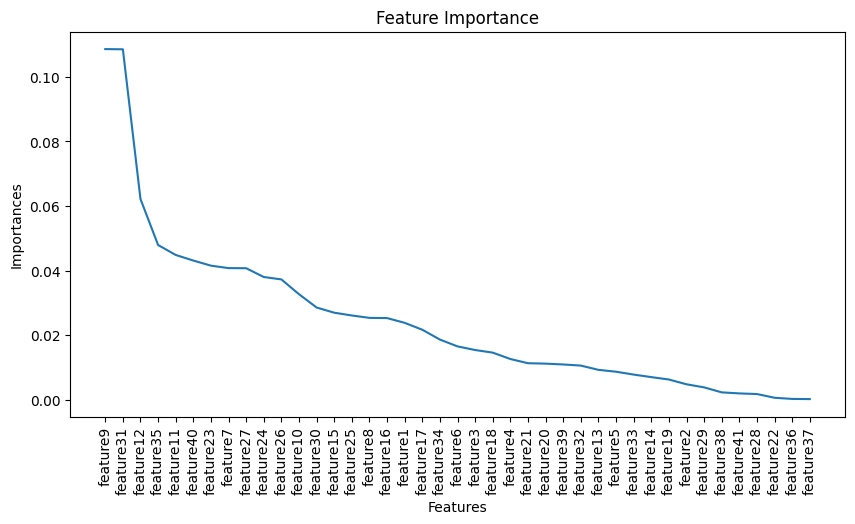

In [80]:
# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feat_imp)

In [81]:
X_train_scaled.shape

(34724, 41)

In [93]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select = 15)
selector.fit(X_train_scaled, y_train)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

In [94]:
selector.n_features_

15

In [95]:
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(selector.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['feature4',
 'feature5',
 'feature6',
 'feature8',
 'feature9',
 'feature10',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature24',
 'feature25']

In [96]:
selected_features = X_train.columns[selector.support_]
print(selected_features)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 25

# Train

In [ ]:
# SVC Model
svc = SVC(random_state=SEED)

# LogisticRegression Model
lr = LogisticRegression()

# Gaussian Naive Bayes Model
bnb = BernoulliNB()

# Train XGBoost Classifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
lgbmc = LGBMClassifier(random_state=SEED)

In [ ]:
models = {}
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
    scores[name]={}
    for scorer in ['precision','recall']:
        scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=10, scoring=scorer)
        
        
def line(name):
    return '*'*(25-len(name)//2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision','recall']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
        print()

In [ ]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100

In [ ]:
scores.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [ ]:
models = {}
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_scaled, y_train)
    preds[name] = models[name].predict(X_test_scaled)
print("Predictions complete.")

In [ ]:
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

In [1]:
import pandas as pd

In [2]:
pd.read_pickle('/mnt/d/MLops/Competition/mlops-mara-sample-public/data/train_data/phase-2/prob-2/selected_features.pickle')

['feature1',
 'feature2',
 'feature3',
 'feature7',
 'feature8',
 'feature9',
 'feature11',
 'feature12',
 'feature15',
 'feature16',
 'feature23',
 'feature25',
 'feature26',
 'feature27',
 'feature30',
 'feature31',
 'feature33',
 'feature34',
 'feature35',
 'feature40']

## Prob 2

In [9]:
import pandas as pd


In [10]:
df2 = pd.read_parquet('/mnt/d/MLops/Competition/mlops-mara-sample-public/data/raw_data/phase-2/prob-2/raw_train.parquet')

In [11]:
df2['label'].value_counts()

label
Normal                   22390
Other                    13963
Exploits                 10864
Denial of Service         9585
Information Gathering     4081
Malware                    958
Name: count, dtype: int64

In [15]:
df2

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.041847,tcp,-,FIN,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,Normal
1,1.089133,tcp,http,FIN,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,Normal
2,0.000002,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,Other
3,1.467246,tcp,ftp,FIN,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Denial of Service
4,0.000927,udp,dns,CON,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61836,1.751882,tcp,smtp,FIN,52.0,40.0,37232.0,3276.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,Normal
61837,0.929489,tcp,-,FIN,10.0,10.0,608.0,646.0,254.0,252.0,...,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,Exploits
61838,0.000008,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,41.0,20.0,51.0,0.0,0.0,0.0,41.0,51.0,0.0,Other
61839,0.000009,unas,-,INT,2.0,0.0,200.0,0.0,254.0,0.0,...,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0,Information Gathering
